In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('data.csv',encoding='unicode_escape')
#to drop the unnecessary data ie agency, std_code,data,sampling_date and location_monitoring_station
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'], axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
#to fill the numerical missing value  with the zero 
df.fillna(0, inplace=True)
# to find the count of null value present in each columns
df.isnull().sum()

C:\Users\dell\AppData\Local\Temp\ipykernel_11532\2596390646.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv',encoding='unicode_escape')


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [2]:
# to calculate the pollutant index for so2(sulphur dioxide)

def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

# to calculate the pollutant index for RSPMI
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# to calculate the pollutant index for spm(suspended particulate matter)
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

# Caluclating the Air Quality Index.
#to calculate the air quality index.
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Using threshold values to classify a particular values as good, moderate, 
# poor, unhealthy, very unhealthy and Hazardous
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant columns for clustering
selected_columns = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
X = df[selected_columns]

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-Means Clustering on Train Set
k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train_scaled)

# Apply the same clusters to the Test Set
X_test['Cluster'] = kmeans.predict(X_test_scaled)

# Inspect Results for Train Set
cluster_centers_train = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_columns)
print("Cluster Centers for Train Set:")
print(cluster_centers_train)

cluster_counts_train = X_train['Cluster'].value_counts()
print("\nCluster Counts for Train Set:")
print(cluster_counts_train)

# Inspect Results for Test Set
cluster_counts_test = X_test['Cluster'].value_counts()
print("\nCluster Counts for Test Set:")
print(cluster_counts_test)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers for Train Set:
         so2        no2        rspm           spm      pm2_5
0   7.016709  17.796862   70.509472  5.689081e+01   0.134714
1  16.843822  41.138653  163.593398  2.073720e+02   0.000753
2   8.878381  24.975913  103.305966  1.151079e-12  48.474629

Cluster Counts for Train Set:
0    238984
1    104061
2      5548
Name: Cluster, dtype: int64

Cluster Counts for Test Set:
0    59693
1    26078
2     1378
Name: Cluster, dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

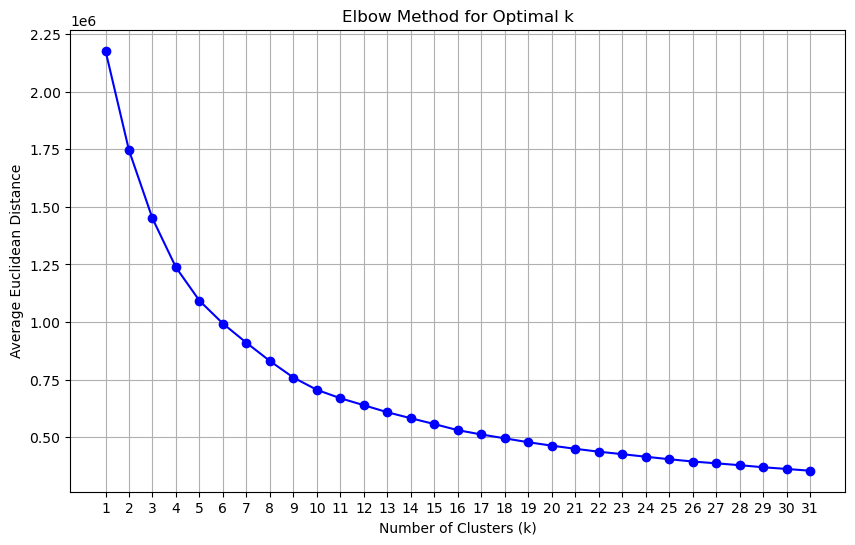

In [4]:

import matplotlib.pyplot as plt

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate average Euclidean distance for different k values
k_values = range(1, 32)
distances = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distances.append(kmeans.inertia_)  # inertia_ gives the sum of squared distances to the nearest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, distances, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.xticks(k_values)
plt.grid(True)
plt.show()


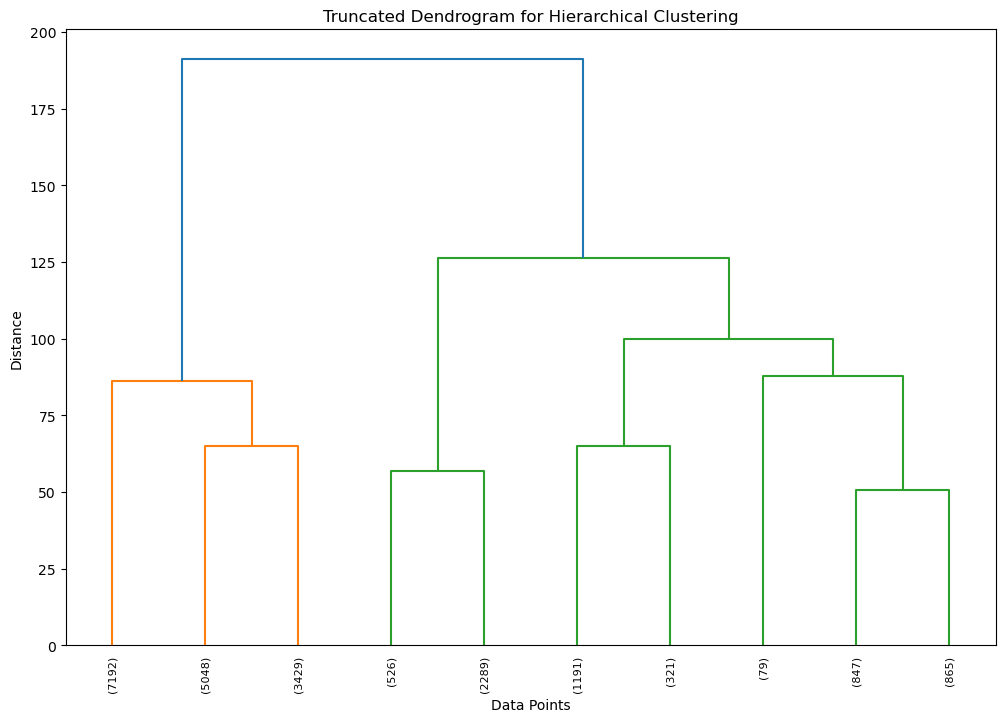

In [7]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Select relevant columns for clustering
selected_columns = ['so2', 'no2', 'rspm']

# Sample a smaller fraction of the data
fraction = 0.05  # adjust as needed
df_sample = df.sample(frac=fraction, random_state=42)
X_sample_scaled = StandardScaler().fit_transform(df_sample[selected_columns])

# Compute pairwise distances
distance_matrix = pdist(X_sample_scaled)

# Perform Agglomerative Clustering
agg_clustering = linkage(X_sample_scaled, method='ward')

# Plot a truncated dendrogram showing the last few clusters
plt.figure(figsize=(12, 8))
num_clusters_to_show = min(10, len(df_sample))
dendrogram(agg_clustering, truncate_mode='lastp', p=num_clusters_to_show, labels=df_sample.index,
           leaf_rotation=90, leaf_font_size=8)
plt.title('Truncated Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

# Assuming 'AQI_Range' is the target column
X = df.drop(['AQI_Range'], axis=1)
y = df['AQI_Range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Use Sequential Feature Selector
sfs = SequentialFeatureSelector(clf,
                                k_features='best',  # You can specify the number of features you want
                                forward=True,
                                floating=False,
                                scoring='accuracy',
                                cv=5)

# Fit the Sequential Feature Selector to the training data
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Plot performance of features
fig = plt.figure()
k_feat = list(sfs.subsets_.keys())
scores = [sfs.subsets_[k]['avg_score'] for k in k_feat]
plt.plot(k_feat, scores, marker='o')
plt.title('Sequential Forward Selection')
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.show()


ModuleNotFoundError: No module named 'mlxtend'


Explained Variance Ratio for each Principal Component:
[3.84156096e-01 2.29350486e-01 1.61155565e-01 1.21660151e-01
 9.82628497e-02 3.67998062e-03 1.49510768e-03 2.39764720e-04
 0.00000000e+00]

Cumulative Explained Variance:
[0.3841561  0.61350658 0.77466215 0.8963223  0.99458515 0.99826513
 0.99976024 1.         1.        ]

Number of components needed for 95% variance: 5


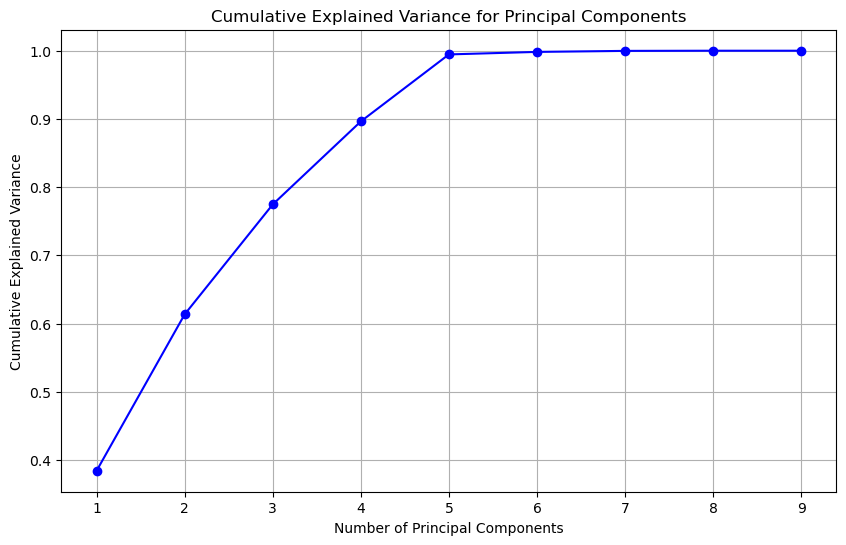

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical columns for PCA
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
X_numeric = df[numerical_columns].drop(['AQI'], axis=1)  # Exclude the 'AQI' column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Find the number of components needed for 95% variance
n_components_95 = (cumulative_explained_variance >= 0.95).argmax() + 1

# Select the first K principal components
X_pca_95 = X_pca[:, :n_components_95]

# Print the results
print("\nExplained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

print("\nNumber of components needed for 95% variance:", n_components_95)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [21]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pandas as pd

# Separate features (X) and target variable (y)
X = df.drop('AQI_Range', axis=1)
y = df['AQI_Range']

# Encode categorical columns using one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Convert target variable to numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Perform PCA to obtain the initial K principal components
k = num_features_95_percent_variance  # Use the previously obtained K
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Use a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using the transformed dataset:", accuracy)
